# Unemployment analysis in India 2019-20
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 

In [32]:
## Data import and Preprocess 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import nbformat


## Feature Engginearing 
from sklearn.preprocessing import  MinMaxScaler 
from sklearn.preprocessing import  StandardScaler 
from sklearn.model_selection import  train_test_split

## Models Selection 
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Deployement 
import joblib

### Import Dataset

In [2]:
data1=pd.read_csv("../datasets/unemploymentData.csv")
data2=pd.read_csv("../datasets/unemployemntRate2011.csv")

In [3]:
data1.head(4)

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural


In [4]:
data1['Date']=data1['Date'].str.strip()

In [5]:
data1['Date']=pd.to_datetime(data1['Date'],format='%d-%m-%Y')

In [6]:
data1['year']=data1['Date'].dt.year

In [7]:
data1['month']=data1['Date'].dt.month

In [8]:
data1.drop(columns=['Date'],inplace=True)

In [9]:
data1.head(4)

,Region,Frequency,Unemployment_Rate,Employed,Labour_Participation,Area,year,month
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019.0,5.0
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019.0,6.0
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019.0,7.0
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019.0,8.0


### Removing Anomalies

We can observe that Frequency column does not give any help to analyze the unemployement.Thus it remove form Dataset.

In [10]:
data1.drop(columns=['Frequency'],inplace=True)

In [11]:
pd.unique(data1['Area'])

array(['Rural', nan, 'Urban'], dtype=object)

In [12]:
data1=data1.dropna()
list(data1.isna().sum())

[0, 0, 0, 0, 0, 0, 0]

## Data Visualization

In [13]:
grouped_data=data1.groupby('year')['Unemployment_Rate'].mean().reset_index()
grouped_data

,year,Unemployment_Rate
0,2019.0,9.399047
1,2020.0,15.101581


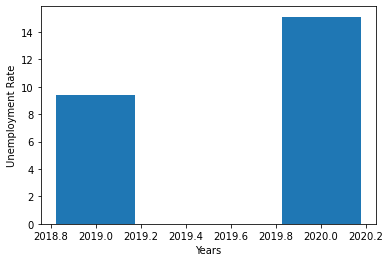

In [14]:
plt.bar(grouped_data['year'],grouped_data['Unemployment_Rate'],width=0.35)
plt.xlabel("Years")
plt.ylabel("Unemployment Rate")
plt.show()

In [15]:
grouped_data=data1.groupby('year').sum().reset_index()
grouped_data

,year,Unemployment_Rate,Employed,Labour_Participation,month
0,2019.0,4041.59,3.191880e+09,18870.92,3655.0
1,2020.0,4681.49,2.139421e+09,12675.37,1074.0


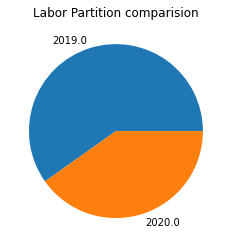

In [16]:
plt.pie(grouped_data['Labour_Participation'],labels=grouped_data['year'])
plt.title("Labor Partition comparision")
plt.show()

It can observed that unemployment incresed from year 2019 to 2020 rapidly.

In [17]:
grouped_data=data1.groupby(['year','month'])['Unemployment_Rate','Employed','Labour_Participation'].mean().reset_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_14608\3668559333.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data=data1.groupby(['year','month'])['Unemployment_Rate','Employed','Labour_Participation'].mean().reset_index()


In [18]:
grouped_data['month_year']=grouped_data['month'].astype(str)+'_'+grouped_data['year'].astype(str)

In [19]:
grouped_data=grouped_data.drop(columns=['year','month'])

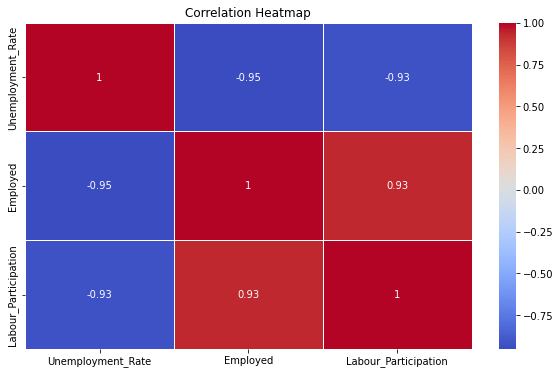

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Unemployment Rate Over Time 2019-20')

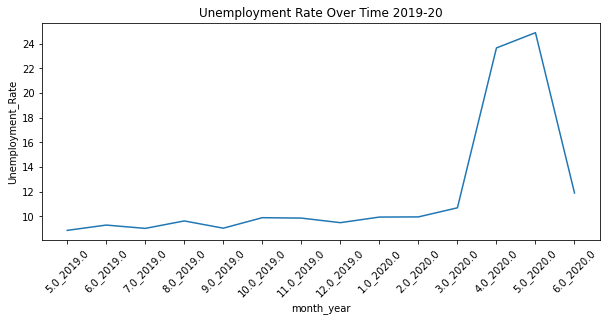

In [21]:
plt.figure(figsize=(10,4))
sns.lineplot(data=grouped_data, x="month_year", y="Unemployment_Rate")
plt.xticks(rotation=45)
plt.title("Unemployment Rate Over Time 2019-20")

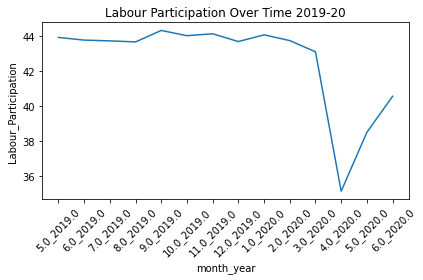

In [22]:
plt.Figure(figsize=(20,4))
sns.lineplot(data=grouped_data, x="month_year", y="Labour_Participation")
plt.xticks(rotation=45)
plt.title("Labour Participation Over Time 2019-20")
plt.tight_layout()
plt.show()

From above observation we can coclude that unemployment was avaragely 9% but in month of April and May of 2020 it was increased to 23% to 25%

Labor participation almost constant all the month yet April 2020 and then it decreases.

In [23]:
grouped_data=data1.groupby('Region').mean().reset_index()

In [24]:
grouped_data=grouped_data.sort_values('Unemployment_Rate')

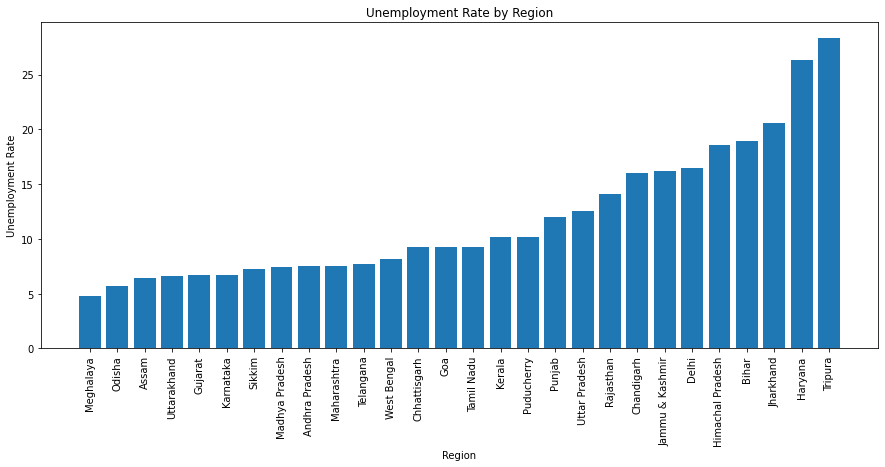

In [25]:
fig,ax=plt.subplots(figsize=(15,6))
ax.bar(x=grouped_data['Region'],height=grouped_data['Unemployment_Rate'])
ax.set_xlabel('Region')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.show()

Above plot shows the unemployment rate of the different states.

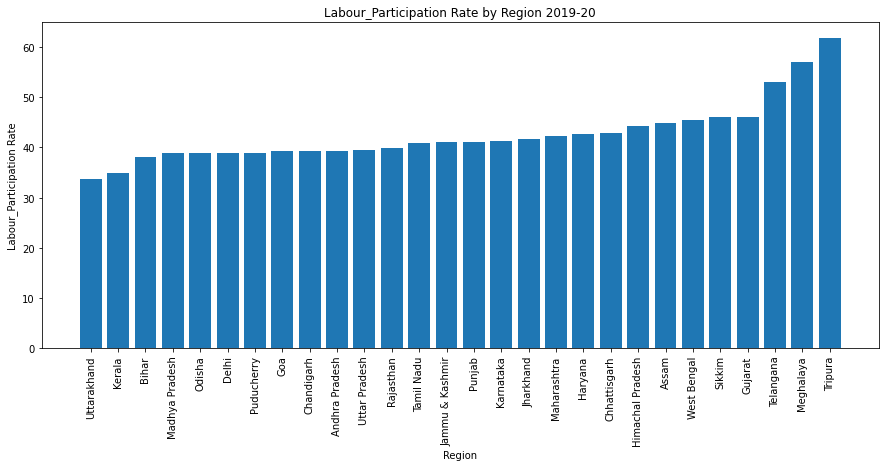

In [180]:
grouped_data=grouped_data.sort_values('Labour_Participation')
fig,ax=plt.subplots(figsize=(15,6))
ax.bar(x=grouped_data['Region'],height=grouped_data['Labour_Participation'])
ax.set_xlabel('Region')
ax.set_ylabel('Labour_Participation Rate')
ax.set_title('Labour_Participation Rate by Region 2019-20')
plt.xticks(rotation=90)
plt.show()

In [33]:
dat = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Latitude': [40.7128, 34.0522, 41.8781, 29.7604],
    'Longitude': [-74.0060, -118.2437, -87.6298, -95.3698],
    'Population': [8398748, 3990456, 2705994, 2320259]
})

fig = px.scatter_geo(dat, lat='Latitude', lon='Longitude', text='City', color='Population',
                     hover_name='City', hover_data=['Population'],
                     title='US Cities Population')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Analyze for 2020

In [181]:
data2['Date']=data2['Date'].str.strip()
data2['Date']=pd.to_datetime(data2['Date'],format='%d-%m-%Y')

In [182]:
data2['year']=data2['Date'].dt.year
data2['month']=data2['Date'].dt.month 
data2['day']=data2['Date'].dt.day
data2.drop(columns=['Date'],inplace=True)

In [183]:
grouped_data=data2.groupby(['year','month']).mean().reset_index()

In [184]:
grouped_data['month_year']=grouped_data['month'].astype(str)+'_'+grouped_data['year'].astype(str)

In [185]:
grouped_data=grouped_data.drop(columns=['year','month'])

Text(0.5, 1.0, 'Unemployment Rate Over Time 2020')

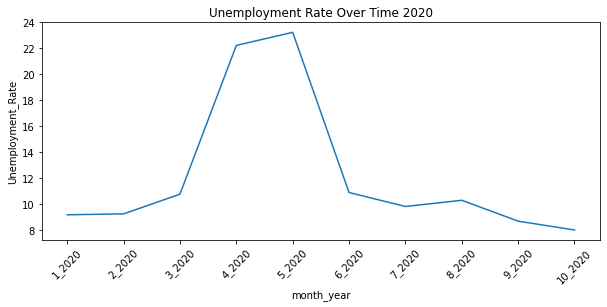

In [186]:
plt.figure(figsize=(10,4))
sns.lineplot(data=grouped_data, x="month_year", y="Unemployment_Rate")
plt.xticks(rotation=45)
plt.title("Unemployment Rate Over Time 2020")

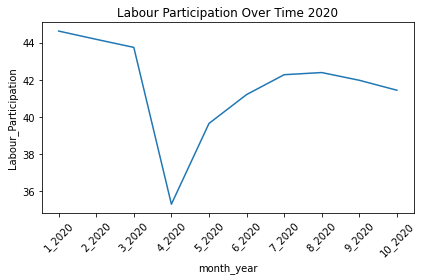

In [187]:
plt.Figure(figsize=(15,4))
sns.lineplot(data=grouped_data, x="month_year", y="Labour_Participation")
plt.xticks(rotation=45)
plt.title("Labour Participation Over Time 2020")
plt.tight_layout()
plt.show()

It can observed that unemployment rate again normalized after the month of July and after next months.

## Conclusion

From given dataset we can observed that impact of covid-19 affect the Indian employment rate on moth of April and March of 2020 where it increased to 25% and again it normalized to 10% After three to four months.